In [1]:
from IPython.display import Latex, display, Math

import sympy as sy
from sympy.interactive import printing;
from sympy.plotting import plot;
from sympy.abc import x, k;

from scipy.integrate import quad

from sympy.utilities.lambdify import lambdastr;

import numpy as np

import math

import ipywidgets as widgets
from ipywidgets import interact, widgets, Layout
from ipywidgets import interactive, interact_manual, interact;

import matplotlib.pyplot as mpl

printing.init_printing(use_latex=True);
mpl.rcParams['figure.figsize'] = 7, 7



In [97]:
def geta0(f,a,b,l):
    a0 = 0
    for i in range(len(f)):
        a0 += quad(sy.lambdify(x,f[i]),a[i],b[i])[0]
    return (1/(2*l))*a0

def getcoeff(f,a,b,l,n):
    ak = []
    bk = []
    for i in range(len(f)):
        fa = f[i]*(sy.cos((k*x*sy.pi)/l))
        fb = f[i]*(sy.sin((k*x*sy.pi)/l))
        
        ffa = eval(lambdastr((x,k),fa))
        ffb = eval(lambdastr((x,k),fb))
        
        for j in range(n):
            if(i==0):
                ak.append((1/l)*quad(ffa,a[i],b[i],args=(j+1), epsabs = 0.1)[0])
                bk.append((1/l)*quad(ffb,a[i],b[i],args=(j+1), epsabs = 0.1)[0])
            else:
                ak[j]+=(1/l)*quad(ffa,a[i],b[i],args=(j+1))[0]
                bk[j]+=(1/l)*quad(ffb,a[i],b[i],args=(j+1))[0]
                    
    return (ak, bk)

#Función invocada por el widget
def displayOutput(N):
    #p1 = F.truncate(n=N)
    coeffs = getcoeff(f,a,b,l,N)
    fa = geta0(f,a,b,l)
    for i in range(N):
        fa += coeffs[0][i]*sy.cos(((i+1)*sy.pi*x)/l) + coeffs[1][i]*sy.sin(((i+1)*sy.pi*x)/l)
        #fa += coeff[0][k]*sy.cos((k+1)*sy.pi*x)
    display(fa.evalf())
    p = plot(f[0],fa, (x, -sy.pi, sy.pi), show = False)
    p[0].line_color='r';
    p.show()
    #display(Latex('$$ T_{'+ str(N) +'} (x) = '+latex(p1)+'$$'))


In [99]:
f = []
a = []
b = []

while True:
    m = int(input('Cantidad de funciones: '))
    if m > 0:
        break

for c in range(1,m+1):    
    f.append(sy.sympify(input("Funcion "+str(c)+": ")))
    a.append(float(sy.sympify(input("a: "))))
    b.append(float(sy.sympify(input("b: "))))

Cantidad de funciones: 2
Funcion 1: x
a: 0
b: 1
Funcion 2: x**2
a: 1
b: 2


In [69]:
interactive_plot = interact_manual(displayOutput, N=(1, 20, 1))

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Button(description='Run Interact', …

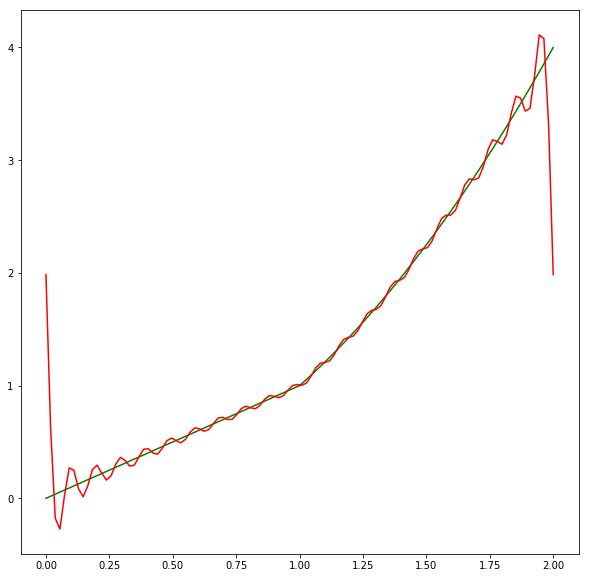

In [100]:
fig, ax = mpl.subplots(figsize=(10, 10));

l=1
N=20

coeffs = getcoeff(f,a,b,l,N)
fa = geta0(f,a,b,l)
display(fa)

#Graficando las funciones
for i in range(m):
    lambdaf = sy.lambdify(x,f[i])
    xv = np.linspace(a[i], b[i], 110)
    ax.plot(xv, lambdaf(xv), color='green')


for j in range(N):
    fa += coeffs[0][j]*sy.cos(((j+1)*sy.pi*x)/l) + coeffs[1][j]*sy.sin(((j+1)*sy.pi*x)/l)

#graficando la funcion obtenida    
lambdaf1 = sy.lambdify(x,fa)
xv1 = np.linspace(0, 2, 110)
ax.plot(xv1, lambdaf1(xv1), color='r')
 
mpl.show()
display(fa.evalf())